<a href="https://colab.research.google.com/github/NaveenKumarK022/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS Spam Detection**

## 📘 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 📂 2. Load Dataset

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 📊 3. Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


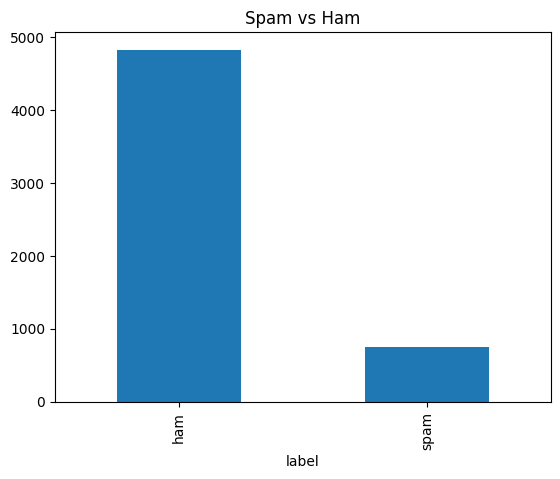

In [ ]:
df.info()
df['label'].value_counts().plot(kind='bar', title='Spam vs Ham')
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


## 🧹 4. Preprocessing the Text

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = "".join([char for char in text if char not in string.punctuation])  # remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)

print("\nCleaned Message Example:")
print(df[['message', 'clean_message']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Cleaned Message Example:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


## 🧪 5. Train-Test Split

In [ ]:
# Train-Test Split
X = df['clean_message']   # ✅ make sure this matches the actual column name
y = df['label_num']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 📦 5. Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['clean_message']).toarray()
y = df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## 🤖 7. Model Training

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Visualize Confusion Matrix

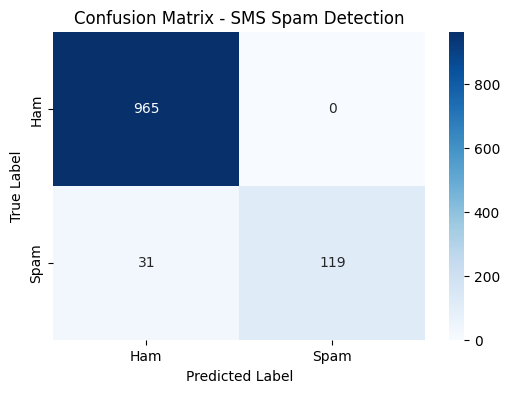

In [ ]:
y_pred = model.predict(X_test_tfidf) # Use the TF-IDF transformed test data for prediction
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - SMS Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

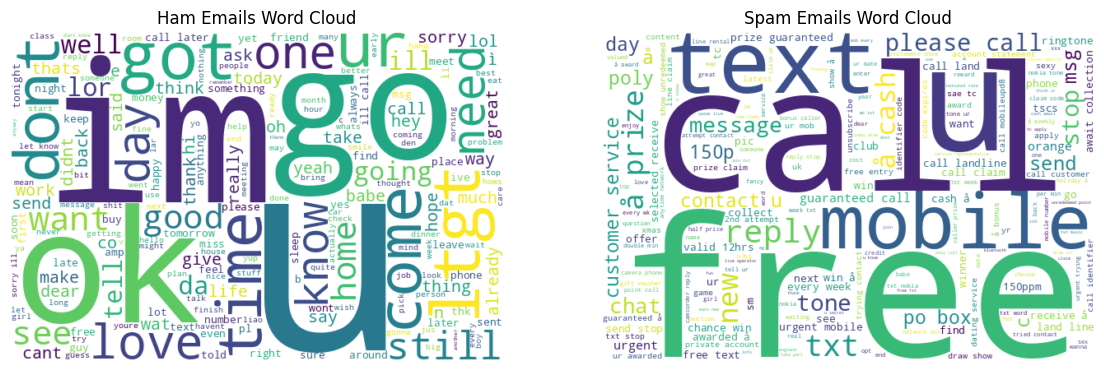

In [ ]:
# Separate spam and ham text
spam_text = " ".join(df[df['label_num'] == 1]['clean_message'])
ham_text = " ".join(df[df['label_num'] == 0]['clean_message'])

# Generate word clouds
from wordcloud import WordCloud # Import WordCloud

spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_text)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].imshow(ham_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Ham Emails Word Cloud')

axs[1].imshow(spam_wc, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Spam Emails Word Cloud')

plt.show()

## 📈 8. Evaluation

In [ ]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9721973094170404
[[965   0]
 [ 31 119]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## 📬 9. Prediction Example

In [ ]:
def predict_spam(message):
    message = clean_text(message)
    vect = vectorizer.transform([message])  # Use the TfidfVectorizer
    prediction = model.predict(vect)
    if prediction[0] == 1 :
     return "Spam"
    else :
     return "Ham"

# Test
predict_spam("Congratulations! You've won a free ticket to Bahamas!")

'Spam'